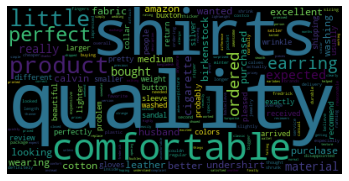

In [3]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

# reading in data
data = pd.read_csv('review_count.csv')
data_train = data
# removing labels
data = data.iloc[:, 2:]

## wordcloud
wordsForCount = []
for label in set(data.columns):
    wordcount = sum(data[label])
    for i in range(int(wordcount)):
        wordsForCount.append(str(label))

wordsForCount = " ".join(wordsForCount)  # turning list of strings into one string
wordcloud = WordCloud(collocations=False).generate(wordsForCount)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [41]:
from sklearn.model_selection import train_test_split

TrainDF, TestDF = train_test_split(data_train, test_size=0.2)
y_test=TestDF["LABEL"]
x_test = TestDF.drop(["LABEL"], axis=1)
## Train data
y_train=TrainDF["LABEL"]
x_train = TrainDF.drop(["LABEL"], axis=1)


The confusion matrix is:
[[ 17   0   0   2  19]
 [  0   8   1   1  14]
 [  0   0  24   3  23]
 [  0   0   0  37  52]
 [  0   0   0   2 257]]
Classification Report:
              precision    recall  f1-score   support

         1.0       1.00      0.45      0.62        38
         2.0       1.00      0.33      0.50        24
         3.0       0.96      0.48      0.64        50
         4.0       0.82      0.42      0.55        89
         5.0       0.70      0.99      0.82       259

    accuracy                           0.75       460
   macro avg       0.90      0.53      0.63       460
weighted avg       0.79      0.75      0.72       460



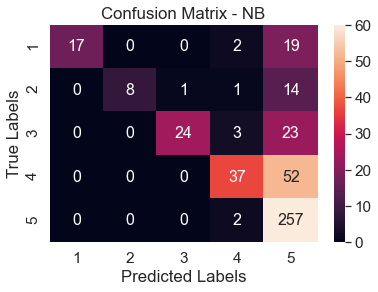

In [42]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.naive_bayes import MultinomialNB
import seaborn as sns

### Instantiate NB
MyModelNB = MultinomialNB()
### Run NB on all training data set
NB1 = MyModelNB.fit(x_train, y_train)

### Use NB model to predict labels
train_prep = MyModelNB.predict(x_train)

### Create confusion matrix to view results
### (rows are true labels, columns are predicted)
topics = ['1', '2', '3', '4', '5']
cnf_matrix1 = confusion_matrix(y_train, train_prep)
print("\nThe confusion matrix is:")
print(cnf_matrix1)

### Convert confusion matrix array to dataframe
df_confusion = pd.DataFrame(cnf_matrix1, range(5), range(5))

print("Classification Report:")
print(classification_report(y_train, train_prep))

### Plot confusion matrix as heatmap
ax = plt.subplot()
sns.set(font_scale=1.4) # label size
sns.heatmap(df_confusion, annot=True, fmt='g', ax=ax, annot_kws={"size": 16}, vmin=0, vmax=60);
ax.set_xlabel('Predicted Labels');
ax.set_ylabel('True Labels');
ax.set_title('Confusion Matrix - NB');
ax.xaxis.set_ticklabels(['1', '2', '3', '4', '5'])
ax.yaxis.set_ticklabels(['1', '2', '3', '4', '5']);
plt.savefig('conf_mat.png', dpi=300, bbox_inches='tight')
plt.show()